In [38]:
import torch
from torchvision import transforms, models 
from matplotlib import pyplot as plt 
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [39]:
vgg = models.vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)

In [40]:
import glob, os
for a, b , c in os.walk('Images/'):
    print(a)

Images/


In [41]:
from PIL import Image
def load_image(img_path, max_size, shape=None):
    image = Image.open(img_path).convert('RGB')
    if max(image.size) < max_size:
        max_size = max(image.size)[0]
    if shape is not None:
        max_size = shape
    resize_image = transforms.Compose([transforms.Resize(size=max_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), 
                                                            (0.5, 0.5, 0.5))
                                        ])
    
    return  resize_image(image)

In [42]:
content = load_image('Images/City.jpg', 250).to(device)
style = load_image('Images/StarryNight.jpg', 250).to(device)

def convert_tensor(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0,1)
    return image

In [43]:
content 

tensor([[[-0.7412, -0.7490, -0.7569,  ..., -0.7569, -0.7569, -0.7647],
         [-0.7176, -0.6941, -0.7020,  ..., -0.7412, -0.7490, -0.7490],
         [-0.7098, -0.6863, -0.6863,  ..., -0.7333, -0.7412, -0.7412],
         ...,
         [-0.9451, -0.9216, -0.8824,  ..., -0.6000, -0.5922, -0.5843],
         [-0.8431, -0.7255, -0.5922,  ..., -0.7412, -0.7020, -0.6392],
         [-0.5373, -0.5686, -0.6549,  ..., -0.9059, -0.8980, -0.8431]],

        [[-0.7490, -0.7569, -0.7725,  ..., -0.7725, -0.7647, -0.7725],
         [-0.7176, -0.7255, -0.7333,  ..., -0.7647, -0.7647, -0.7725],
         [-0.7255, -0.7176, -0.7176,  ..., -0.7569, -0.7725, -0.7725],
         ...,
         [-0.9373, -0.9216, -0.8824,  ..., -0.7098, -0.7176, -0.7176],
         [-0.8431, -0.7255, -0.5843,  ..., -0.8118, -0.7804, -0.7412],
         [-0.5451, -0.5686, -0.6314,  ..., -0.9216, -0.9216, -0.8745]],

        [[-0.8118, -0.8039, -0.8275,  ..., -0.7961, -0.7882, -0.7882],
         [-0.7882, -0.7882, -0.7961,  ..., -0

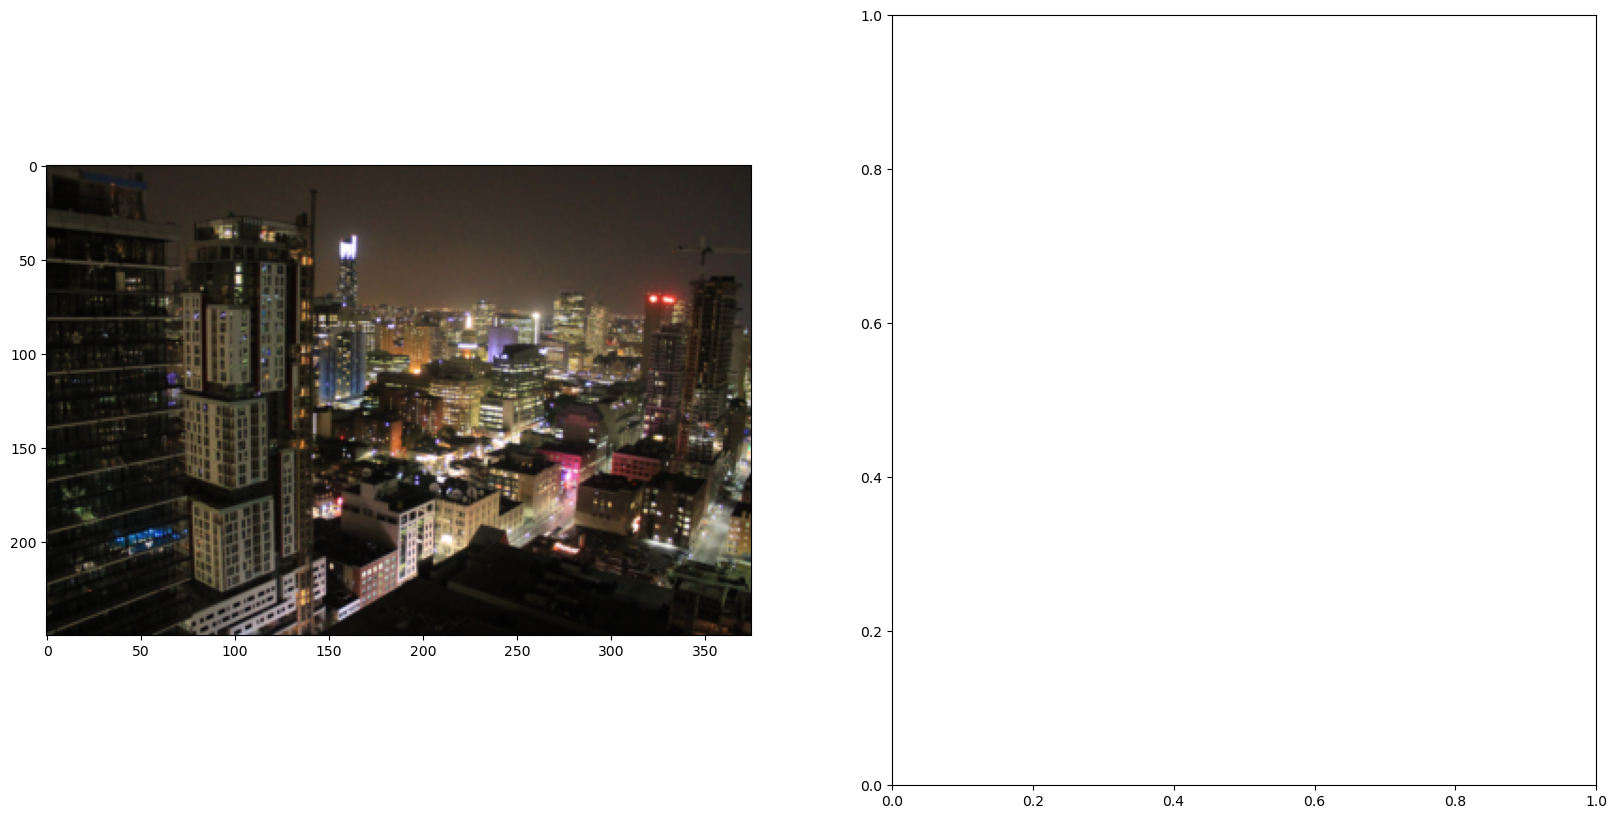

In [44]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(convert_tensor(content))
ax2.imshow(convert_tensor())